In [1]:
import os

import numpy as np
from skimage.io import imread

import matplotlib.pyplot as plt

from scipy import ndimage

from skimage.morphology import watershed
from skimage.feature import peak_local_max

import deepcell as dc


RESULTS_DIR = '/data/results/cells/MouseBrain/generic/set_0_x_3_y_2'
RAW_DIR = '/data/data/cells/MouseBrain/generic/set0/stacked_raw/set_0_x_3_y_2'

SEGMENT_DIR = os.path.join(RESULTS_DIR, 'segment')
DISTANCE_DIR = os.path.join(RESULTS_DIR, 'watershed_4bins')

IMAGE_INDEX = 20

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load the data
raw_file = dc.nikon_getfiles(RAW_DIR, 'slice')[IMAGE_INDEX]
image_file = dc.nikon_getfiles(SEGMENT_DIR, 'feature_1')[IMAGE_INDEX]
distance_file = dc.nikon_getfiles(DISTANCE_DIR, 'argmax')[IMAGE_INDEX]

raw = dc.get_image(os.path.join(RAW_DIR, raw_file))
image = dc.get_image(os.path.join(SEGMENT_DIR, image_file))
distance = dc.get_image(os.path.join(DISTANCE_DIR, distance_file))

distance = distance - 1

In [3]:
raw_local_maxi = peak_local_max(distance, indices=False, labels=raw)
raw_markers = ndimage.label(raw_local_maxi)[0]
raw_labels = watershed(distance, raw_markers, mask=image)

local_maxi = peak_local_max(distance, indices=False, labels=image)
markers = ndimage.label(local_maxi)[0]
labels = watershed(distance, markers, mask=image)

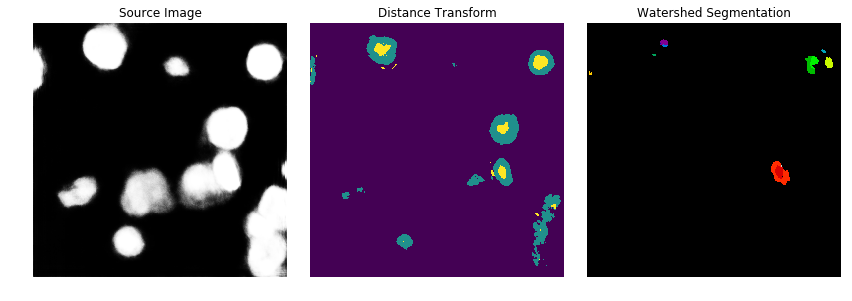

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Source Image')

ax[1].imshow(distance, interpolation='nearest')
ax[1].set_title('Distance Transform')

ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Watershed Segmentation')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

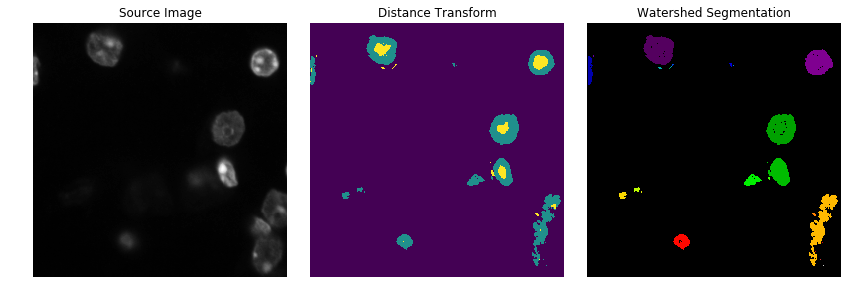

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(raw, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Source Image')

ax[1].imshow(distance, interpolation='nearest')
ax[1].set_title('Distance Transform')

ax[2].imshow(raw_labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Watershed Segmentation')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()